<a href="https://colab.research.google.com/github/theresaltrinh/project_voting/blob/main/Visuals%3A%20Density%20Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
! git clone https://github.com/theresaltrinh/project_voting

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [102]:
df = pd.read_csv('/content/cleaned_voting_VA.csv')
df.head()

,Unnamed: 0,year,countyName,countyCode,candidate,party,candidatevotes,totalvotes
0,0,2000,Accomack,51001,Al Gore,Democrat,5092,11925
1,1,2000,Accomack,51001,George W. Bush,Republican,6352,11925
2,2,2000,Accomack,51001,Ralph Nader,Green,220,11925
3,3,2000,Accomack,51001,Other,Other,261,11925
4,4,2000,Albemarle,51003,Al Gore,Democrat,16255,36846


Text(0.5, 1.0, 'Total Votes by Year')

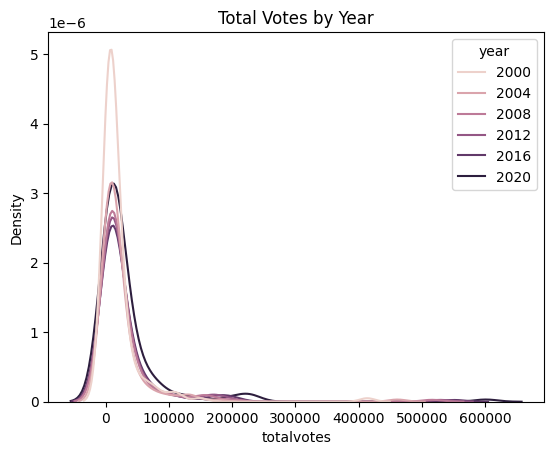

In [98]:
sns.kdeplot(data = df, x = 'totalvotes', hue = 'year')
plt.title('Total Votes by Year')

Text(0.5, 1.0, 'Candidate Votes By Year')

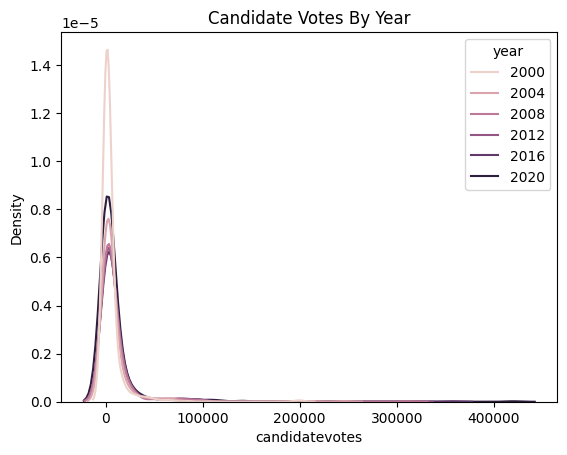

In [99]:
sns.kdeplot(data = df, x = 'candidatevotes', hue = 'year')
plt.title('Candidate Votes By Year')

In [103]:
#adjacencies
cdf = pd.read_csv('/content/cleaned_county_adjacencies.csv')
cdf.head()
#cdf.describe()

,Unnamed: 0,County,Population,CountyCode,District,Neighborhood1,Neighborhood2,Neighborhood3,Neighborhood4,Neighborhood5,Neighborhood6,Neighborhood7,Neighborhood8,Neighborhood9,Neighborhood10,Neighborhood11,Neighborhood12
0,0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Population', ylabel='Density'>

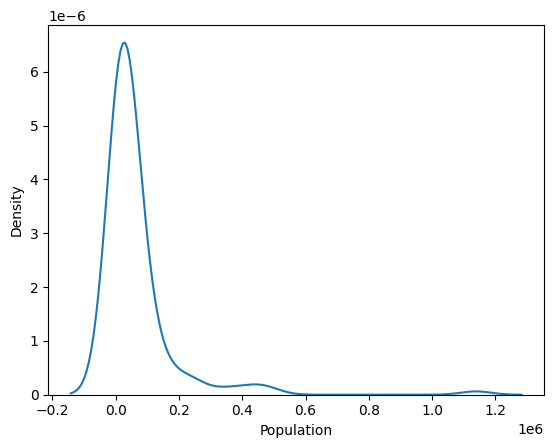

In [ ]:
sns.kdeplot(data=cdf, x = 'Population' )

In [110]:
gdf = gpd.read_file('/content/VirginiaCounty_ClippedToShoreline.shx')
gdf.head()

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
mdf = gdf.merge(cdf,left_on='FIPS_left',right_on='CountyCode')  # merge county population and adjacency data into df
del gdf, cdf

Text(0.5, 1.0, 'VA Population Density Map')

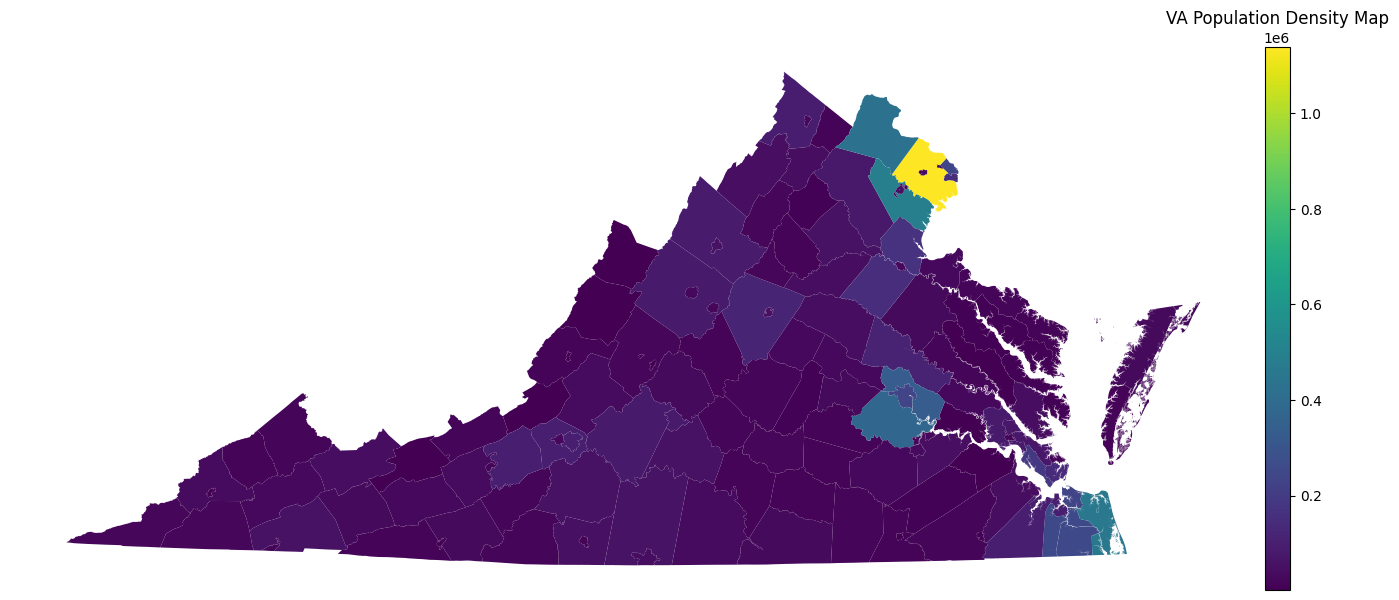

In [95]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='Population',legend=True,cax=cax)
plt.title('VA Population Density Map')

In [111]:
df20 = df.loc[ df['year']=='2020',:] # Only the 2020 data

#Democrat Votes
Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('countyCode')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
mdf = mdf.merge(Dvotes,left_on='FIPS_left',right_on='countyCode')

#Republican Votes
Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('countyCode')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
mdf = mdf.merge(Rvotes,left_on='FIPS_left',right_on='countyCode')



/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

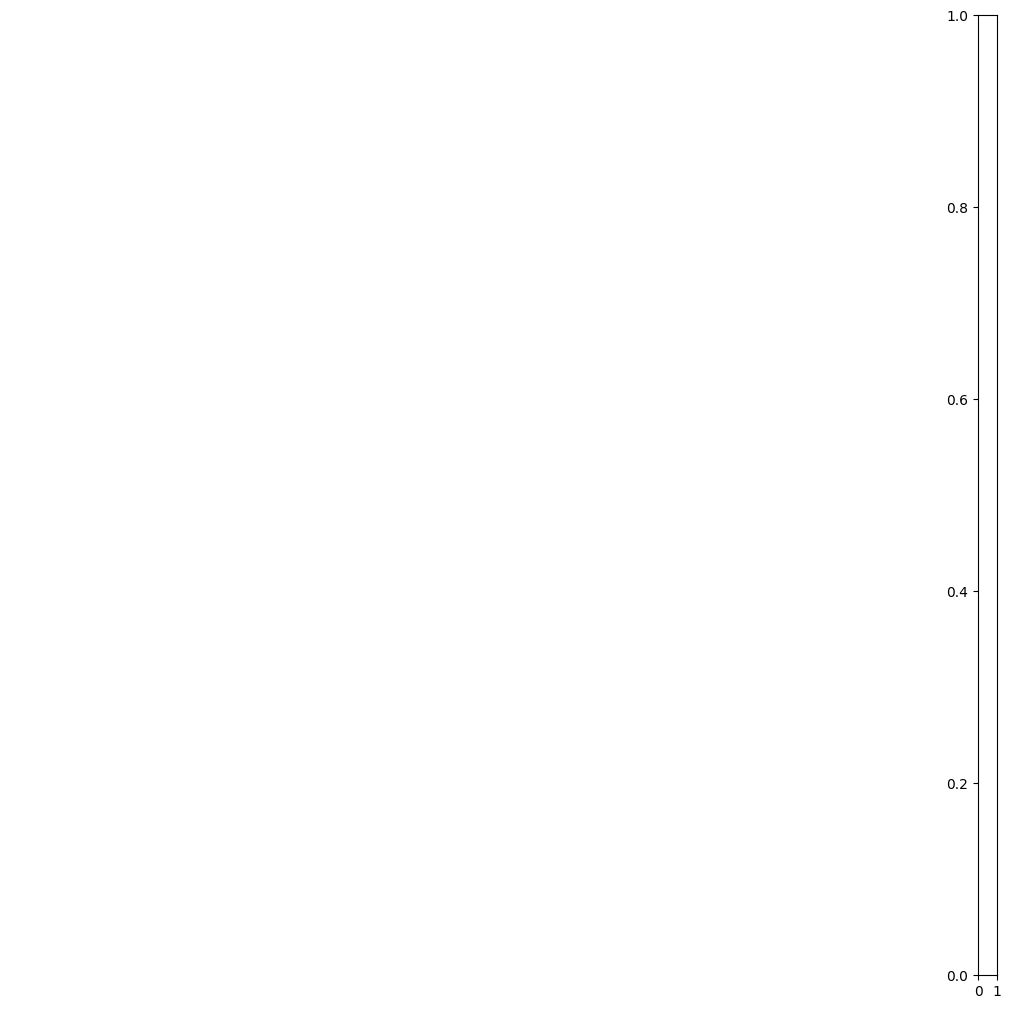

In [112]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='dem_votes_2020',legend=True,cax=cax)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

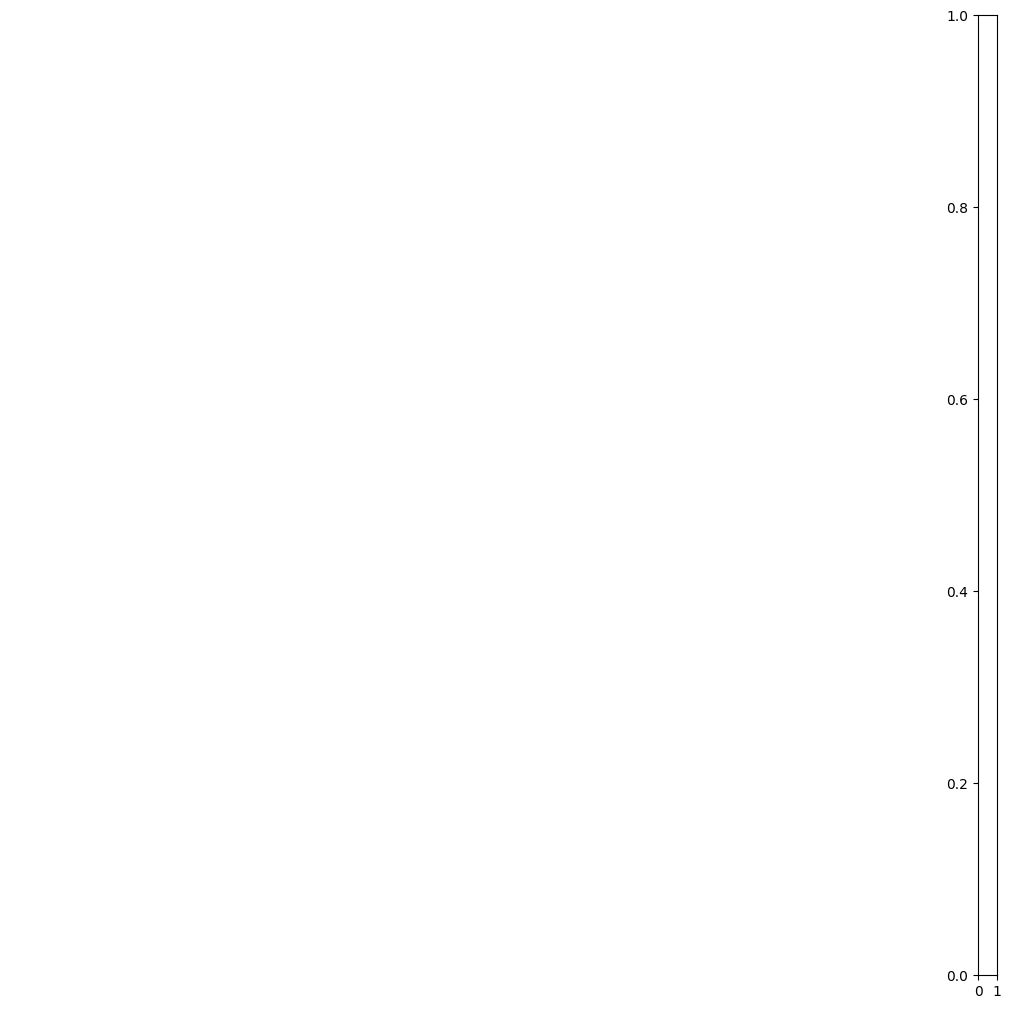

In [114]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='rep_votes_2020',legend=True,cax=cax)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

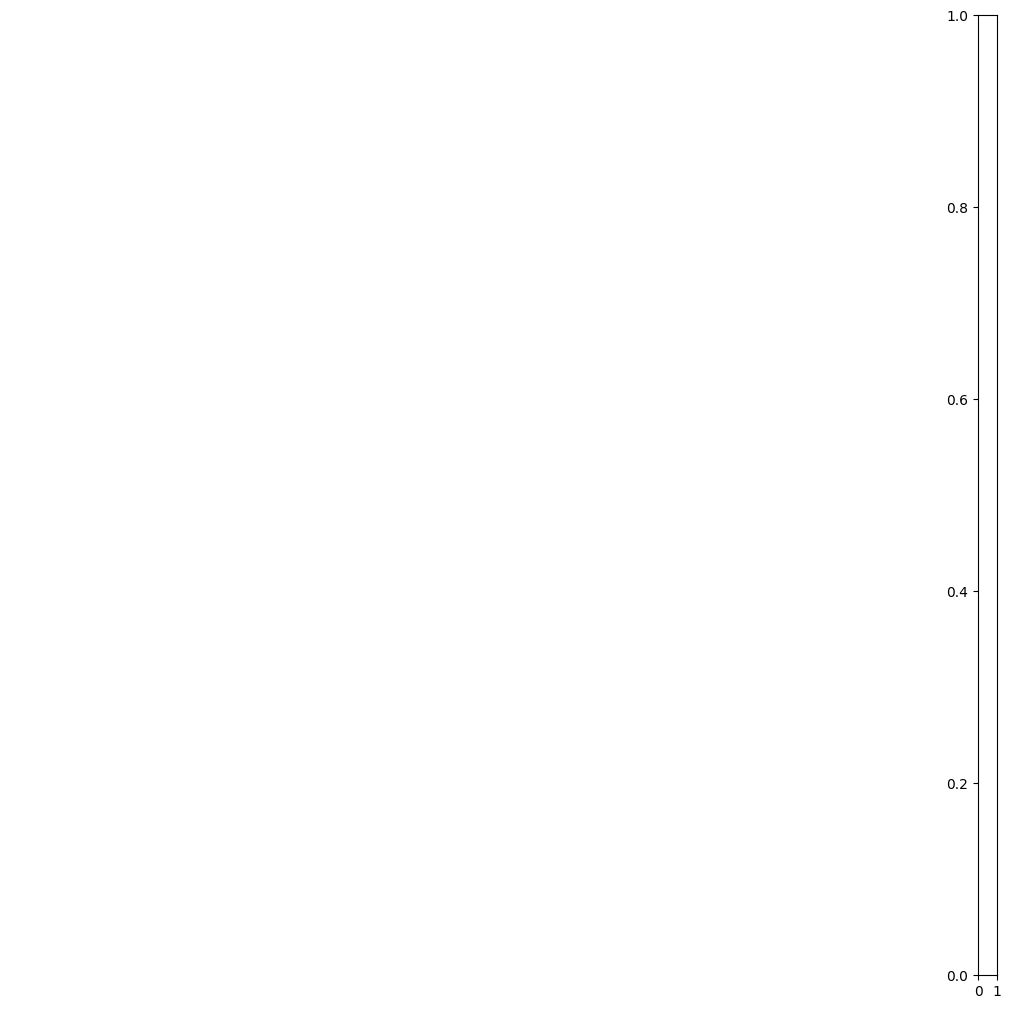

In [115]:
df['vote_diff'] = mdf['rep_votes_2020']-mdf['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mdf.plot(ax=ax,column='vote_diff',legend=True,cax=cax,cmap='bwr',edgecolor='k')